## <CENTER><U>Assignment 01
## <CENTER><U>**CLASSIFICATION**

## Problem:<BR>
The diabetes dataset is given. The objective is to predict based on diagnostic
measurements whether a patient has diabetes.<BR><BR>
Dataset description<BR>
• Pregnancies: To express the Number of pregnancies<BR>
• Glucose: To express the Glucose level in blood<BR>
• BloodPressure: To express the Blood pressure measurement<BR>
• SkinThickness: To express the thickness of the skin<BR>
• Insulin: To express the Insulin level in blood<BR>
• BMI: To express the Body mass index<BR>
• DiabetesPedigreeFunction: To express the Diabetes percentage<BR>
• Age: To express the age<BR>
• Outcome: To express the final result 1 is YES o is NO<BR><BR>
Note : The zeros in the dataset are actually nan values. Treat zeros as nan and
impute them using any suitable methods.



---





---



### **DATA PREPROCESSING**



In [183]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Loading the dataset

In [184]:
data = pd.read_csv('/content/diabetes.csv')

In [185]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [186]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [187]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


#### Replace all zeros with NaN values

In [188]:
data[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']] = \
data[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']].replace(0, np.nan)

In [189]:
data.isna().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

#### Handling missing Values

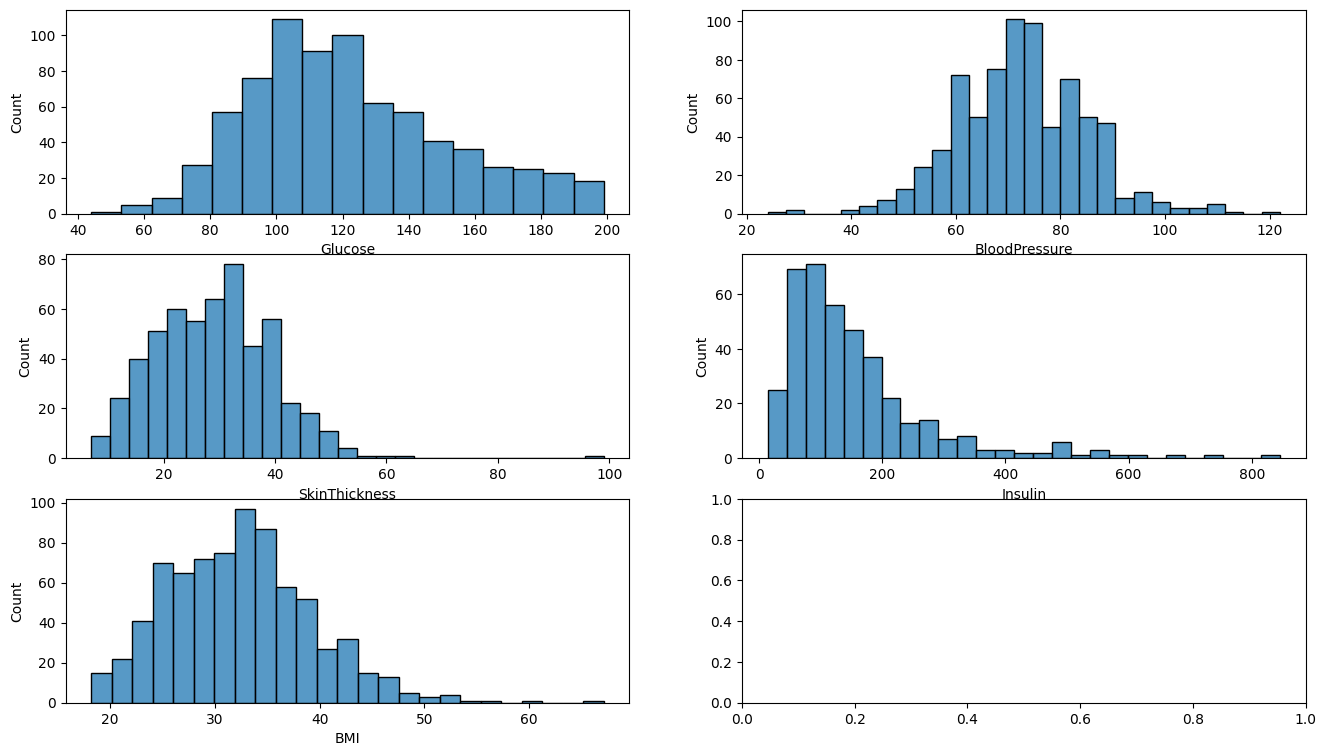

In [190]:
fig, axes = plt.subplots(3, 2, figsize=(16,9))
sns.histplot(x='Glucose', data=data, ax=axes[0, 0])
sns.histplot( x= "BloodPressure", data=data, ax=axes[0, 1])
sns.histplot( x= "SkinThickness", data=data, ax=axes[1, 0])
sns.histplot( x= "Insulin", data=data, ax=axes[1, 1])
sns.histplot( x= "BMI", data=data, ax=axes[2, 0])
plt.show()

Fill missing numerical values with the mean

In [191]:
for i in ['Glucose','BloodPressure','SkinThickness', 'Insulin','BMI']:
  data[i].fillna(data[i].median(), inplace=True)

#### Split the dataset into features (x) and target (y)

In [192]:
x = data.drop(['Outcome'], axis = 1)
y = data['Outcome']

In [193]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

#### Scale numerical features (Standardization)

In [194]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [195]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.386719,29.108073,140.671875,32.455208,0.471876,33.240885,0.348958
std,3.369578,30.438286,12.096642,8.791221,86.383060,6.875177,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### **MODEL SELECTION AND TRAINING**

In [196]:
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix, f1_score, precision_score

##### Logistic Regression

In [197]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(x_train,y_train)
y_pred_log_reg = log_reg.predict(x_test)

##### KNN

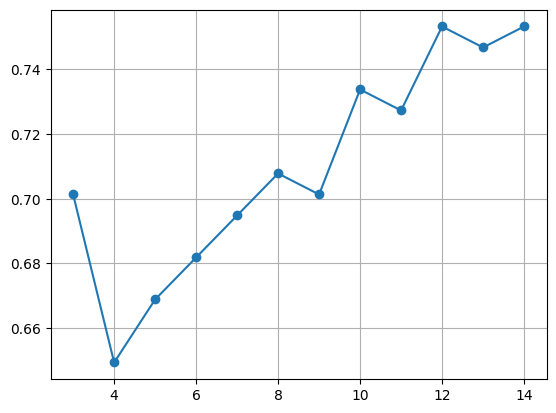

In [198]:
from sklearn.neighbors import KNeighborsClassifier
metric_k = []
neighbours =np.arange(3,15)

for k in neighbours:
  knn_clf = KNeighborsClassifier(n_neighbors= k, metric = 'minkowski',p=2)
  knn_clf.fit(x_train, y_train)
  y_pred_knn = knn_clf.predict(x_test)
  acc = accuracy_score(y_test, y_pred_knn)
  metric_k.append(acc)

plt.plot(neighbours, metric_k, 'o-')
plt.grid()

number of neighbours taken as 12

In [199]:
knn_clf = KNeighborsClassifier(n_neighbors=12, metric = 'minkowski')
knn_clf.fit(x_train, y_train)
y_pred_knn_clf = knn_clf.predict(x_test)

##### SVM

In [200]:
from sklearn.svm import SVC
svm_linear = SVC(kernel='linear')
svm_linear.fit(x_train, y_train)
y_pred_svm_linear = svm_linear.predict(x_test)

##### Naive Bayes Classifier

In [201]:
from sklearn.naive_bayes import GaussianNB
modelNB = GaussianNB()
modelNB.fit(x_train, y_train)
y_pred_modelNB = modelNB.predict(x_test)

##### Decision Tree Classifier



In [202]:
from sklearn.tree import DecisionTreeClassifier
clf_tree = DecisionTreeClassifier()
clf_tree.fit(x_train, y_train)
y_pred_clf_tree = clf_tree.predict(x_test)

##### Random Forest

In [203]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(random_state=1)
rf_clf.fit(x_train, y_train)
y_pred_rf_clf = rf_clf.predict(x_test)

#### Metrics Comparison of different Models:

In [216]:
dt_ = [{'Accuracy': accuracy_score(y_test, y_pred_log_reg), 'Precision': precision_score(y_test, y_pred_log_reg),
       'Recall': recall_score(y_test, y_pred_log_reg), 'F1 Score': f1_score(y_test, y_pred_log_reg),
       'Confusion Matrix':confusion_matrix(y_test, y_pred_log_reg)},
      {'Accuracy': accuracy_score(y_test, y_pred_knn_clf), 'Precision': precision_score(y_test, y_pred_knn_clf),
       'Recall': recall_score(y_test, y_pred_knn_clf), 'F1 Score': f1_score(y_test, y_pred_knn_clf),
       'Confusion Matrix':confusion_matrix(y_test, y_pred_knn_clf)},
      {'Accuracy': accuracy_score(y_test, y_pred_svm_linear), 'Precision': precision_score(y_test, y_pred_svm_linear),
       'Recall': recall_score(y_test, y_pred_svm_linear), 'F1 Score': f1_score(y_test, y_pred_svm_linear),
       'Confusion Matrix':confusion_matrix(y_test, y_pred_svm_linear)},
      {'Accuracy': accuracy_score(y_test, y_pred_modelNB), 'Precision': precision_score(y_test, y_pred_modelNB),
       'Recall': recall_score(y_test, y_pred_modelNB), 'F1 Score': f1_score(y_test, y_pred_modelNB),
       'Confusion Matrix':confusion_matrix(y_test, y_pred_modelNB)},
       {'Accuracy': accuracy_score(y_test, y_pred_clf_tree), 'Precision': precision_score(y_test, y_pred_clf_tree),
       'Recall': recall_score(y_test, y_pred_clf_tree), 'F1 Score': f1_score(y_test, y_pred_clf_tree),
       'Confusion Matrix':confusion_matrix(y_test, y_pred_clf_tree)},
       {'Accuracy': accuracy_score(y_test, y_pred_rf_clf), 'Precision': precision_score(y_test, y_pred_rf_clf),
       'Recall': recall_score(y_test, y_pred_rf_clf), 'F1 Score': f1_score(y_test, y_pred_rf_clf),
       'Confusion Matrix':confusion_matrix(y_test, y_pred_rf_clf)},
     ]

index_labels=['Logistic Regression','KNN','SVM','Naive Bayes', 'Decision Tree', 'Random Forest']
df = pd.DataFrame(dt_, index=index_labels)

df

,Accuracy,Precision,Recall,F1 Score,Confusion Matrix
Logistic Regression,0.766234,0.693878,0.618182,0.653846,"[[84, 15], [21, 34]]"
KNN,0.753247,0.688889,0.563636,0.620000,"[[85, 14], [24, 31]]"
SVM,0.766234,0.702128,0.600000,0.647059,"[[85, 14], [22, 33]]"
Naive Bayes,0.759740,0.673077,0.636364,0.654206,"[[82, 17], [20, 35]]"
Decision Tree,0.681818,0.548387,0.618182,0.581197,"[[71, 28], [21, 34]]"
Random Forest,0.753247,0.660377,0.636364,0.648148,"[[81, 18], [20, 35]]"


#### **INFERENCES**
***Logistic Regression and SVM have the highest accuracy at 76.62% and they are showing strong and balanced performance in terms of precision, recall, and F1 score.<br>***
***Naive Bayes and Random Forest also good with balanced precision and recall.<br>***
***K-Nearest Neighbors (KNN) performs well but has a slightly lower recall compared to Logistic Regression and SVM.<br>***
***The Decision Tree model exhibits improved recall but at the cost of lower precision.<br>***